# Image Compression Techniques

## IF YOU CANNOT LOAD THE BINDER NOTEBOOK, USE THE FOLLOWING COLAB BACKUP FOR THE DEMO (ALONG WITH THE PDF):


### How does image compresion work?

Image compression - or in the more general sense, data compression - is the process of reducing the encoding requirements for a specific set of information.  There are many reasons one may have for compressing data, including storage requirements, transmission overhead, and computational limitations.  Often times, datasets can have statistical redundancies or less relevant data, which can allow for compression to be utilized.

### Types of data compression:

 - Lossless Compression: As the name implies, no data is lost during lossless compression; statistical redundancies are used to reduce the size of the dataset.
Example: A dataset with many repeated characters, like the one shown below, can be represented as the pattern of characters instead. 

Dataset: 1 1 1 1 1 1 4 4 4 4 4 4 4 5 5 5 5 5 

Compressed: 1-6, 4-7, 5-5

.



- Lossy Compression: Although not all data is conserved, lossy compression can be useful in greatly reducing the size of a dataset without losing the majority of the content.
Example: A dataset with high precision may be reduced in size by rounding the values while conserving trends in the data.

Dataset: 1.0003, 1.0005, 4.0002, 5.0007

Compressed: 1, 1, 4, 5 


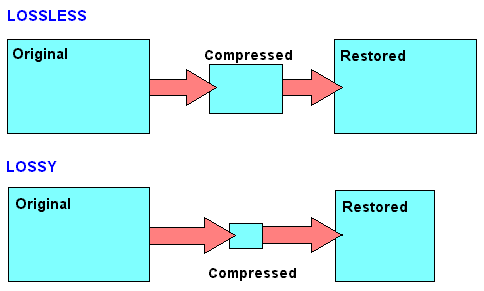
lossless compression. (n.d.) Computer Desktop Encyclopedia. (1981-2019). Retrieved April 14 2021 from https://encyclopedia2.thefreedictionary.com/lossless+compression


Key differences to note: The lossless requirement restricts the effectiveness of lossless compression, especially in nearly random datasets.  Meanwhile, lossy compression can provide major reductions in file size, at the cost of increasing loss of data, as the reconstruction is never the same size as the original.  

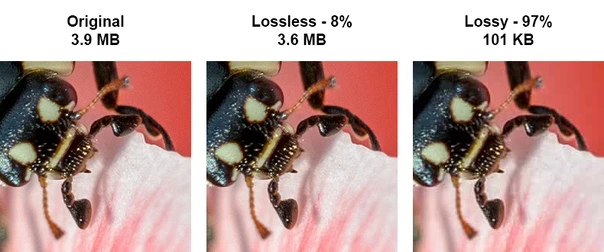
Retrieved from https://blog.shortpixel.com/complete-guide-image-compression-reduce-image-sizes-faster-sites/

As shown in the image above, although lossless compression can reduce file size by a small amount, lossy compression can be quite effective in applications where minor loss is tolerated.

### Problem 1: 

Using what you've learned so far about lossy vs lossless compression, which of the two techniques would be most applicable for the following paintings.  Provide a short explanation with your answer:

a: *A Sunday on La Grande Jatte*, Georges Seurat, 1884; A quintessential example of pointilism, or art made from many individual dots.
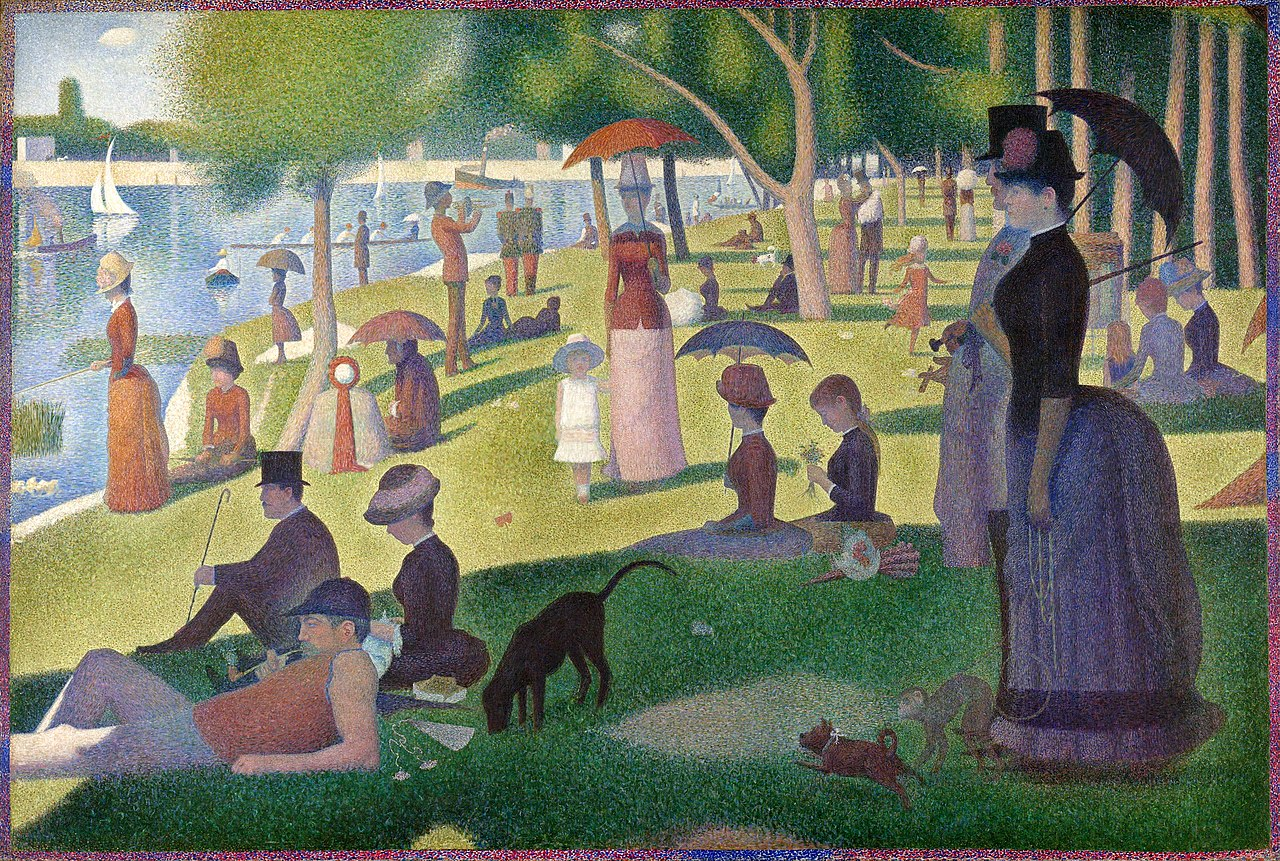
 
b: *Composition II in Red, Blue, and Yellow*, 1930, Piet Mondrian; An example of modern art with a geometric flair.
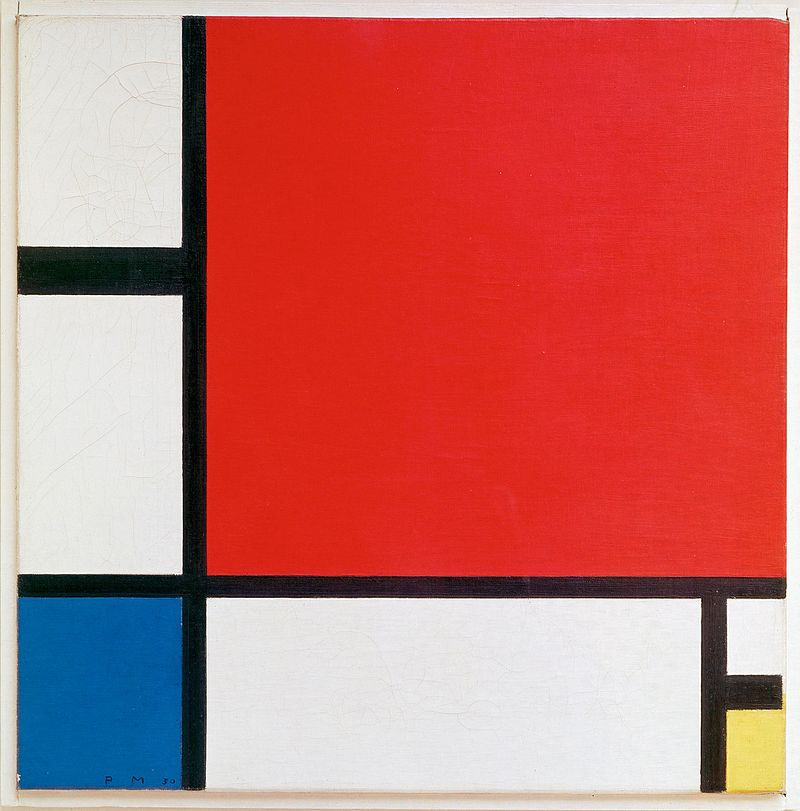
    
### Problem 2: 

Try to describe a rough method to store and reconstruct Mondrian's painting in a lossless way.  Hint: It may be simpler to think about a (re)construction process first, and then encode those instructions for *Composition II in Red, Blue, and Yellow*.

# Examples of Image Compression Methods: PCA

### What is PCA again?
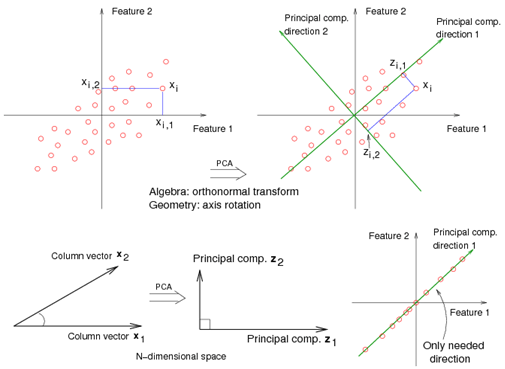
Retrieved from: https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Compresssion_via_Dimensionality_Reduction_1_Principal_component_analysis%20_PCA.php

Principal Component Analysis, or PCA, is concerned with determining vectors of maximum variance, with each vector orthogonal to the previous one.  In the example above, these orthogonal vectors represent the distribution of variance in the 2-D dataset, with the majority distributed along the near-linear dataset.

Once the dominant principal component(s) are found, less important components can be removed, and the data can be either represented in a lower dimension, or reconstructed as an approximate dataset.

### Problem 3:

Refresher: How have we been finding these principal components in class?  
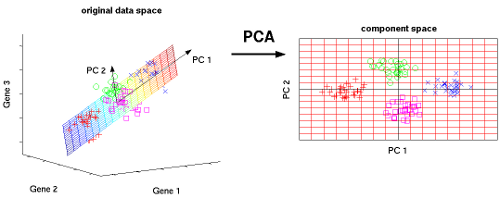

### Problem 4:

The following picture has been significantly compressed using PCA. How many principal components do you think are present?
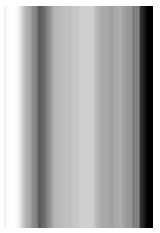
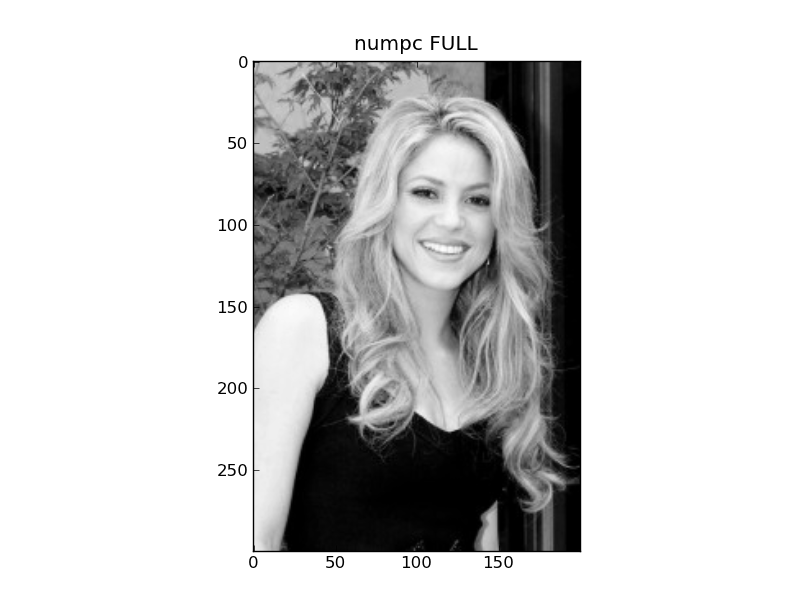
Retrieved from: https://glowingpython.blogspot.com/2011/07/pca-and-image-compression-with-numpy.html


# Demo: Implementing PCA on Color Images

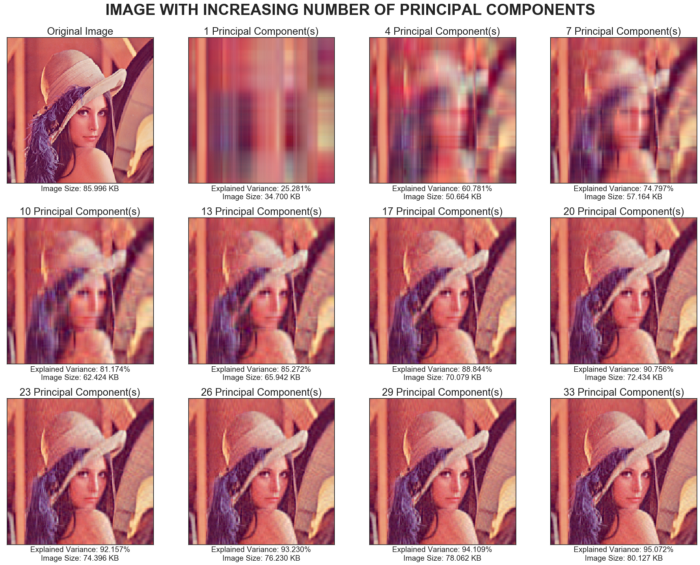
Retrieved from: https://medium.com/analytics-vidhya/image-compression-using-k-means-clustering-and-principal-component-analysis-in-python-893fd37e8e15

# PCA Demo

A slider is provided to change the number of Principal components present.  The individual and cumulative variance ratios are also plotted.

## IF YOU CANNOT OPEN THE JUPYTER NOTEBOOK, USE THE INCLUDED PDF AND TRY THE DEMO ON MY COLLAB, LOCATED AT THIS LINK:
https://colab.research.google.com/drive/15BEUs4hUY3zXVWUShPWUSE8n-G8pg8N1?usp=sharing

In [4]:
#PCA applied to Image compression
#This Code for this implementation for PCA was modified for Jupyter Interactivity from 
# https://www.askpython.com/python/examples/principal-component-analysis-for-image-data
# Importing required libraries
import cv2
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import ipywidgets as widgets
from ipywidgets import interact


def PCA_c(pc=20):
        # Loading the image 
    n_comps=int(pc)    
    img = io.imread('https://www.cc.gatech.edu/sites/default/files/images/college-of-computing-history.jpg') #you can use any image you want.
    io.imshow(img)
    io.show()
    
    # Splitting the image in R,G,B arrays.

    blue,green,red = cv2.split(img) 
    #it will split the original image into Blue, Green and Red arrays.
    #initialize PCA with first 20 principal components
    pca = PCA(n_comps)
    
    #Applying to red channel and then applying inverse transform to transformed array.
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
    plt.figure(1)
    plt.plot(pca.explained_variance_ratio_)
    plt.xlabel('number of components')
    plt.ylabel('explained variance');
    plt.show
    plt.figure(2)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    plt.show
    #Applying to Green channel and then applying inverse transform to transformed array.
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)

    #Applying to Blue channel and then applying inverse transform to transformed array.
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)

    img_compressed = (np.dstack((blue_inverted, green_inverted, red_inverted))).astype(np.uint8)
    #viewing the compressed image
    plt.figure(3)
    io.imshow(img_compressed)
    io.show()
interact(PCA_c, pc=widgets.FloatSlider(min=1, max=500, step=1, value=5, continuous_update=False));


interactive(children=(FloatSlider(value=5.0, continuous_update=False, description='pc', max=500.0, min=1.0, st…

##### Problem 5

- a: The second graph shows the cumulative variance of the resulting image as a function of the number of active principal components.  How many principal components are necessary for 95% cumulative variance?  

- b: Notice that with this implementation of PCA on color-image compression causes a significant number of artifacts.  Speculate on the cause of these artifacts.  Do you have any ideas how to fix this issue? (Hint: Would a b&w photo have similar issues?)

- b: Move the slider and pick a representation you like (don't worry if it looks glitchy).  Note the number of Principal components and the cumulative variance in the photo.  Take a screenshot of the image and paste into your answers doc.

# K-means Demo: A comparison in image compression

Briefly, K-means clustering can also be used compress images.  Although an in-depth explanation of the algorithm is out of the scope of this tutorial, essentially k-means is a method to segment data into k segments, as shown below.  
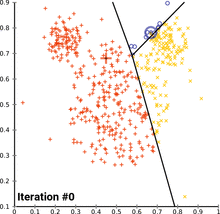
CC:Chire, Own work

If you're interested in a deeper explanation, a full walkthrough is provided here: https://medium.com/analytics-vidhya/image-compression-using-k-means-clustering-and-principal-component-analysis-in-python-893fd37e8e15
Try out the demo below.  Once again, a slider is provided to change the fidelity of the image.
## Note: The kmeans demo make take a few seconds to complete a new iteration.
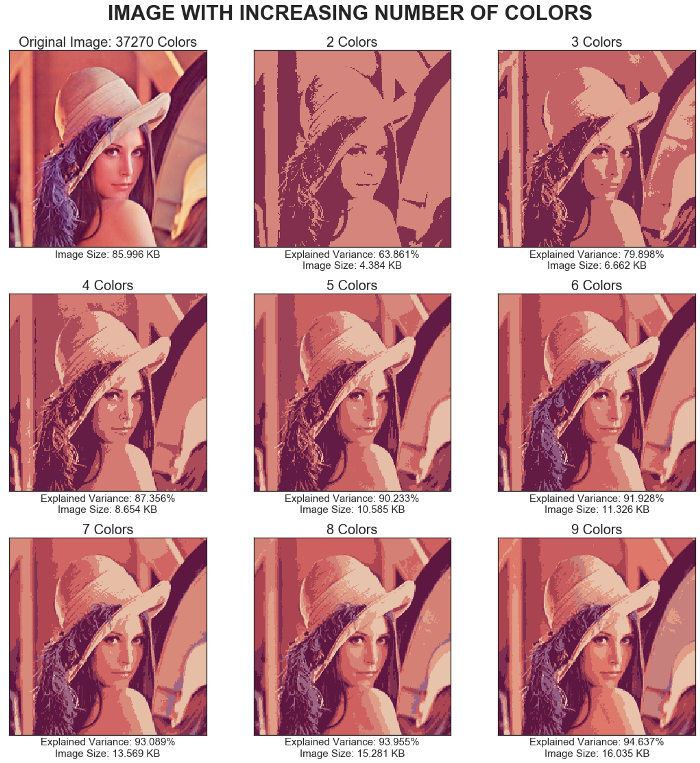
Retrieved from: https://medium.com/analytics-vidhya/image-compression-using-k-means-clustering-and-principal-component-analysis-in-python-893fd37e8e15

In [2]:
#K-means clustering applied to Image compression
#This Code for this implementation for Kmeans was modified for Jupyter Interactivity from 
# https://towardsdatascience.com/image-compression-using-k-means-clustering-aa0c91bb0eeb

from skimage import io
from sklearn.cluster import KMeans
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

def kmeans(n=5):  
   #Read the image
    image = io.imread('https://www.cc.gatech.edu/sites/default/files/images/college-of-computing-history.jpg')
    io.imshow(image)
    io.show()
    n_clusters=int(n)

    #Dimension of the original image
    rows = image.shape[0]
    cols = image.shape[1]

    #Flatten the image
    image = image.reshape(rows*cols, 3)

    #Implement k-means clustering to form k clusters
    kmeans = KMeans(n_clusters)
    kmeans.fit(image)

    #Replace each pixel value with its nearby centroid
    compressed_image = kmeans.cluster_centers_[kmeans.labels_]
    compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

    #Reshape the image to original dimension
    compressed_image = compressed_image.reshape(rows, cols, 3)

    #Save and display output image
    io.imsave('compressed_image_64.png', compressed_image)
    io.imshow(compressed_image)
    io.show()
    
interact(kmeans, n=widgets.FloatSlider(min=2, max=10, step=1, value=5, continuous_update=False));

interactive(children=(FloatSlider(value=5.0, continuous_update=False, description='n', max=10.0, min=2.0, step…

##### Problem 6

- a: Try moving around the slider.  What do you think each cluster represents in the resulting images?

- b: How are the two methods similar?  How are they different? (This can be merely from a visual perspective)

- c: Once again, pick an image, screenshot, and note the number of clusters. :)

In [ ]:
Sources:
    https://medium.com/analytics-vidhya/image-compression-using-k-means-clustering-and-principal-component-analysis-in-python-893fd37e8e15
    https://towardsdatascience.com/image-compression-using-k-means-clustering-aa0c91bb0eeb    
    https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html